# Finding Non-Crossover Events

Sandbox for functions used in `viewer.py`

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import CSS4_COLORS as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Circle
import pandas as pd
import numpy as np

Zac's data files

In [2]:
# All SNPs -- takes a long time to load
# bsp_SNPs = pd.read_pickle('BSP_TIGER.marker_dataframe.pickle.gzip', compression='gzip')

In [3]:
# Interval file -- SNPs collapsed into blocks
bsp_intervals = pd.read_pickle('BSP_TIGER.intervals_dataframe.pickle.gzip', compression='gzip')

In [4]:
# Crossover locations -- 1575 records
# bsp_COs = pd.read_pickle('bsp_COs_final_set.pickle.gzip', compression='gzip')

In [5]:
bsp_intervals.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
100999,BSP-OR-202,1,1,2820551,N2,BSP-OR-202-1,2820551,7310
101000,BSP-OR-202,1,2820551,2820595,transition,BSP-OR-202-1,44,2
101001,BSP-OR-202,1,2820595,2821506,CB4856,BSP-OR-202-1,912,27
101002,BSP-OR-202,1,2821506,2821610,transition,BSP-OR-202-1,104,2
101003,BSP-OR-202,1,2821610,8506388,N2,BSP-OR-202-1,5684779,4643


In [6]:
clist = sorted(bsp_intervals['sample'].unique())

In [7]:
clist[:10]

['BSP-OR-001',
 'BSP-OR-002',
 'BSP-OR-003',
 'BSP-OR-004',
 'BSP-OR-005',
 'BSP-OR-006',
 'BSP-OR-007',
 'BSP-OR-008',
 'BSP-OR-009',
 'BSP-OR-010']

In [8]:
len(clist)

610

Intervals in an interesting chromosome:

In [9]:
chrom = bsp_intervals[bsp_intervals.chrom_id == 'BSP-OR-001-4']

In [10]:
chrom

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
111,BSP-OR-001,4,1,1996956,CB4856,BSP-OR-001-4,1996956,2719
112,BSP-OR-001,4,1996956,1997145,transition,BSP-OR-001-4,189,2
113,BSP-OR-001,4,1997145,1997566,N2,BSP-OR-001-4,422,19
114,BSP-OR-001,4,1997566,1997578,transition,BSP-OR-001-4,12,2
115,BSP-OR-001,4,1997578,2156628,CB4856,BSP-OR-001-4,159051,348
...,...,...,...,...,...,...,...,...
169,BSP-OR-001,4,14548901,14549615,N2,BSP-OR-001-4,715,52
170,BSP-OR-001,4,14549615,14549671,transition,BSP-OR-001-4,56,2
171,BSP-OR-001,4,14549671,15669138,CB4856,BSP-OR-001-4,1119468,3022
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2


In [11]:
# Our peak data
peaks = pd.read_pickle('peaks.pickle.gzip')

In [12]:
peaks.head()

,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0
67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0
67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0
67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0
67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0


In [13]:
peaks[(peaks.chrom_id == 'BSP-OR-001-4') & (peaks.blk_id == 0)]

,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [14]:
pks = peaks[peaks.chrom_id == 'BSP-OR-001-4']

In [15]:
def make_circles(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    res = []
    rownum = 0
    for grp_id, grp in df.groupby('blk_id'):
        w = grp.iloc[-1].position - grp.iloc[0].position
        m =  grp.iloc[0].position + w/2
        x0 = m - 1250000
        rownum += 1
        for _, snp in grp.iterrows():
            p = (snp.position - grp.iloc[0].position) / w
            x = x0 + p*2500000
            res.append(Circle((x,-1000000*rownum),100000,color=pcolor[snp.base_geno]))
    return rownum, res

In [19]:
def make_patches(chrom):
    pcolor = {
        'CB4856': 'dodgerblue',
        'N2': 'indianred'
    }
    res = []
    for _, r in chrom.iterrows():
        c = pcolor.get(r.hmm_state) or 'lightgray'
        res.append(Rectangle((r.start,0), r.length, 500000, color=c))
        res.append(Circle((r.start,250000), 50000, color='black'))
    return res

In [82]:
def plot_intervals(chrom):
    rects = PatchCollection(make_patches(chrom), match_original=True)
    nrows, p = make_circles(pks)
    dots = PatchCollection(p, match_original=True)
    fig, ax = plt.subplots(figsize=(10,(nrows+1)/2))
    plt.box(False)
    plt.yticks([])
    plt.xticks(ticks=np.linspace(0,20000000,5), labels=[f'{int(n*20)}Mbp' for n in np.linspace(0,1,5)])
    ax.xaxis.set_ticks_position('top')
    ax.add_collection(rects)
    ax.add_collection(dots)
    plt.xlim(0,20000000)
    plt.ylim(-1000000*(nrows+1),2000000)


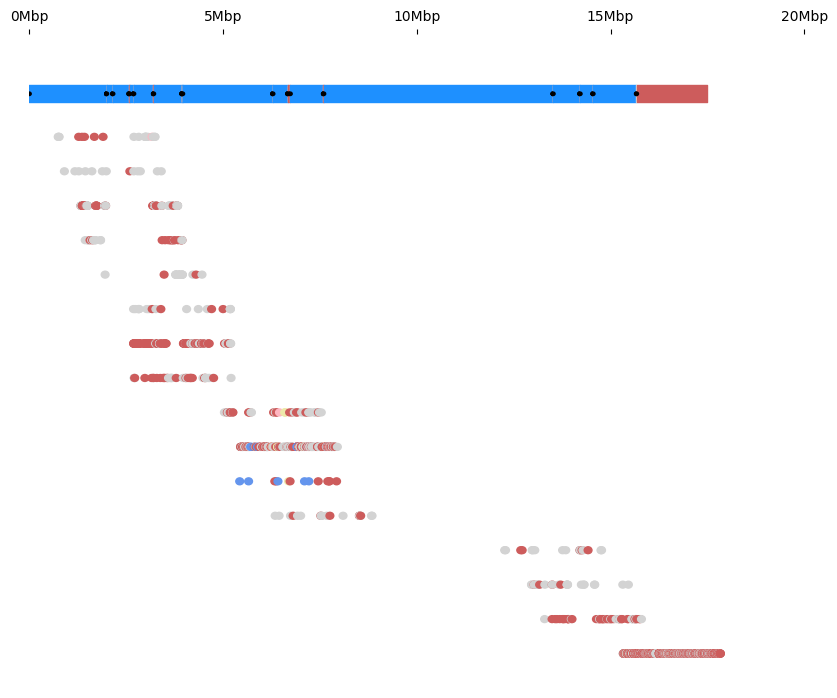

In [83]:
plot_intervals(chrom)

In [154]:
def dot_plots(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    dotfigs = {}
    for grp_id, grp in df.groupby('blk_id'):
        if len(grp) == 0:
            continue
        fig, ax = plt.subplots(figsize=(10,1))
        plt.box(False)
        plt.xlim(0,10)
        plt.ylim(0,1)
        plt.yticks([])
        x0 = grp.iloc[0].position
        w = grp.iloc[-1].position - x0
        plt.xticks(ticks=np.linspace(0,10,5), labels=[f'{int(n*w)}bp' for n in np.linspace(0,1,5)])
        plt.suptitle(f'Block #{grp_id}\nStart: {(x0/1000000):.1f}Mbp\nLength: {w}bp', x=0, y=0.5, size='medium',ha='left')
        res = []
        for _, snp in grp.iterrows():
            p = (snp.position - x0) / w
            x = p*10
            res.append(Circle((x,0.2),0.1,color=pcolor[snp.base_geno]))
        dots = PatchCollection(res, match_original=True)
        ax.add_collection(dots)
        plt.close(fig)
        dotfigs[grp_id] = fig
    return dotfigs  

In [155]:
figs = dot_plots(pks)

In [156]:
len(figs)

16

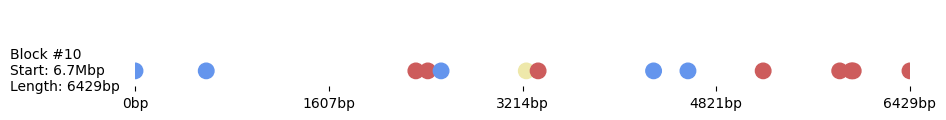

In [157]:
figs[10]

In [69]:
pks.head()

,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0


In [50]:
np.arange(0,10,2.5)

array([0. , 2.5, 5. , 7.5])

In [55]:
np.linspace(0,1,5,endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [57]:
w = 526

In [58]:
[ f'{int(n*w)}bp' for n in np.linspace(0,1,5,endpoint=True)]

['0bp', '131bp', '263bp', '394bp', '526bp']

In [135]:
n = 3400000

In [137]:
f'{n:3.1f}'

'3400000.0'

In [158]:
p = True

In [161]:
p ^= 1

In [162]:
p

1